In [15]:
#FANCY INDEXING
import numpy as np

rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
#accessing 3 different elements
[x[2], x[4], x[8]]

[14, 60, 74]

In [3]:
indices = [1,3,0]
x[indices]

array([92, 71, 51])

In [4]:
indices = np.array([[2,6],
                    [8,3]])
indices

array([[2, 6],
       [8, 3]])

In [5]:
x[indices]

array([[14, 82],
       [74, 71]])

Fancing indexing in multiple dimension

In [6]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]   # Result = [X[0,2], X[1,1], X[2,3]]

array([ 2,  5, 11])

The pairing of indices in fancy indexing follows all the broadcasting rules

In [8]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
X[row[:, np.newaxis], col] #broadcasting hhere

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

COMBINED INDEXNG
Fancy indexing can be combined with other indexing schemes that we are familiar with.

In [10]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
#fancy and normal indexing combined

X[2, [2, 0, 1]]   # X[row_index (normal indexing), col_indices (fancy indexing)]

array([10,  8,  9])

In [12]:
 #fancy indexing with slicing combined

X[1:, [3, 1, 2]]      #X[rows_1_2, cols_3_1_2]

array([[ 7,  5,  6],
       [11,  9, 10]])

In [13]:
row

array([0, 1, 2])

In [14]:
#fancy indexing with masking combined

mask = np.array([1, 0, 1, 0], dtype = bool)
X[row[:, np.newaxis], mask]     #skip the second and fourth col (masked)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

EXAMPLE : SELECTING RANDOM POINTS   
A common use of fancy indexing is the selection of subsets of rows from a matrix.
Suppose, we have a NxD matrix representing N points in D dimensions.
Let’s create a matrix in which the elements are drawn from a 2-dimensional normal distribution.

In [22]:
import numpy as np
rand = np.random.RandomState(42)

mean = [0, 0]
#covariance matrix
cov = [[1, -3],
       [-3, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_14644\3950364382.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = rand.multivariate_normal(mean, cov, 100)


(100, 2)

In [23]:
X[:4]

array([[-0.50752012,  1.17633072],
       [-1.83041639,  0.90843621],
       [ 0.44460594, -0.44462323],
       [-2.44169868,  3.29672893]])

In [24]:
X.mean(axis = 0)

array([ 0.11680625, -0.27436292])

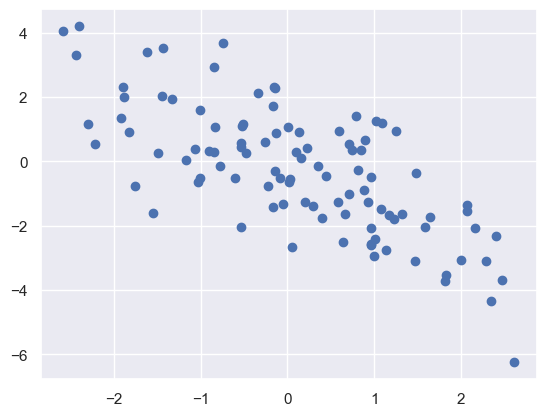

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   #for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [29]:
"""Let’s use fancy indexing to select 20 random points, by choosing 20 random indices with no repeats,
and use these indices to select a portion of the original array."""

'Let’s use fancy indexing to select 20 random points, by choosing 20 random indices with no repeats,\nand use these indices to select a portion of the original array.'

In [30]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([59, 75, 25, 24, 58,  8, 79, 47, 64, 29, 12, 95, 34, 20, 81, 69, 50,
       41, 57, 53])

In [31]:
selection = X[indices]
selection.shape

(20, 2)

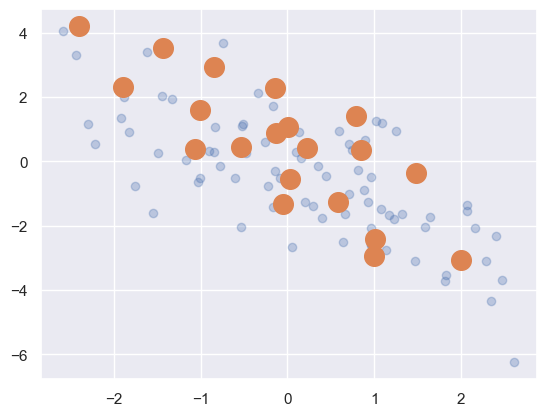

In [34]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1], s = 200);

#This technique can be used to quickly partition datasets, such as splitting data into train/test validation datasets.

In [35]:
#Modifying values with fancy indexing

x = np.arange(10)
i = np.array([2, 1, 8, 4])
print(x)
x[i] = 99
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]


In [36]:
# any assignment operator works
print(x)
x[i] -=10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [38]:
#Sorting Arrays
x = np.array([3, 4, -3, 0, 8])
np.sort(x) #returns a new sorted array

array([-3,  0,  3,  4,  8])

In [39]:
x     #original array unchanged

array([ 3,  4, -3,  0,  8])

In [40]:
x.sort()
x       #original array sorted in-place

array([-3,  0,  3,  4,  8])

In [42]:
x = np.array([2, 3, -2, 7, 0])
np.argsort(x)          #returns the indices of sorted elements

array([2, 4, 0, 1, 3], dtype=int64)

In [43]:
#In order to get the elements in sorted order from the indices above, we can use fancy indexing.

x[np.argsort(x)]     #fancy indexing; equivalent to x[[2, 4, 0, 1, 3]]

array([-2,  0,  2,  3,  7])

SORTING ALONG ROWS OR COLUMNS

In [2]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [3]:
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [4]:
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Partial Sorts: Partitioning
Sometimes, we do not want to sort the entire array, rather we want to simply find the K smallest
values in the array. In order to do so, NumPy provide the np.partition function

In [5]:
import numpy as np
x = np.array([7, 2, 3, 1, 6, 5, 4])
print(x)
np.partition(x, 3) # The first 3 elements in the returned arrays are the smallest 3

[7 2 3 1 6 5 4]


array([2, 1, 3, 4, 6, 5, 7])

In [8]:
# get the largest k numbers
-np.partition(-x, 3) # k = 3

array([6, 7, 5, 4, 2, 3, 1])

In [9]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [10]:
np.partition(X, 3, axis=1) # 3 smallest values along rows

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [2, 1, 4, 5, 7, 7],
       [0, 4, 1, 5, 9, 5]])

In [11]:
np.partition(X, 3, axis=0) # 3 smallest values along cols

array([[2, 2, 5, 0, 1, 5],
       [5, 1, 4, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

Structured Data: Numpy’s Structured Arrays


In [12]:
name = ["Alice", "Bob", "Cathy", "Steve"]
age = [35, 42, 25, 15]
weight = [60.3, 80.2, 75.1, 51.0]

In [13]:
import numpy as np
#use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})
data.dtype


dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [14]:
data

array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [15]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 35, 60.3), ('Bob', 42, 80.2), ('Cathy', 25, 75.1),
       ('Steve', 15, 51. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [16]:
 # get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Steve'], dtype='<U10')

In [17]:
 # get first row of data
data[0]

('Alice', 35, 60.3)

In [18]:
 # updating data value
data[0]['name'] = 'Micheal'
data[0]

('Micheal', 35, 60.3)

In [19]:
# get the name from the last row
data[-1]['name']

'Steve'

In [20]:
 np.dtype({'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})


dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [21]:
# For clarity, numerical types can be specified with Python types of NumPy dtypes
np.dtype({'names':('name', 'age', 'weight'),
'formats':((np.str_, 10), int, np.float32)}) # Python type (int) and NumPy types (np.str_, np.float32)

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [22]:
 # compound type can also be specified as a list of tuples
np.dtype([('name','S10'),('age','i4'), ('weight','f8')])


dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [23]:
# if name of the types do not matter, can specify the types only
np.dtype('S10, i4, f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

RecordArrays: Structured Arrays with a Twist


In [25]:
data['age']

array([35, 42, 25, 15])

In [26]:
data_rec = data.view(np.recarray) # RecordArray
data_rec.weight # recordarray makes it possible to access 'age' as an attribute

array([60.3, 80.2, 75.1, 51. ])

In [28]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

439 ns ± 55.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.86 μs ± 710 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.7 μs ± 5.91 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
